In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib as mpl

In [2]:
df2 = pd.read_csv("/Users/ujwal/Downloads/record-145706.csv",header=0)

In [3]:
df2 = df2.drop('sleep_position [NA](/api/datatype/270/)',1)

In [4]:
df2 = df2.dropna()

In [5]:
df2.rename(columns={'time [s/256]': 'TimeSeries','breathing_rate [rpm](/api/datatype/33/)':'breathing_rate', 'minute_ventilation [mL/min](/api/datatype/36/)':'ventilation','activity [g](/api/datatype/49/)':'activity', 'heart_rate [bpm](/api/datatype/19/)': 'heart_rate','cadence [spm](/api/datatype/53/)':'steps'}, inplace=True)

In [6]:
for i in df2.index:
        df2.at[i, 'TimeSeries'] = df2.at[i, 'TimeSeries'] /256
for i in df2.index:
        df2.at[i, 'TimeSeries'] = datetime.datetime.fromtimestamp(df2.at[i, 'TimeSeries'])
for i in df2.index:
        df2.at[i, 'TimeSeries'] = df2.at[i, 'TimeSeries'].strftime('%Y-%m-%d %H:%M:%S')

In [7]:
df2['TimeSeries'] =  pd.to_datetime(df2['TimeSeries'], format='%Y-%m-%d %H:%M:%S')

In [8]:
final_data = df2.reset_index().set_index('TimeSeries').resample('H').mean()

In [9]:
final_data = final_data.drop('index',1)

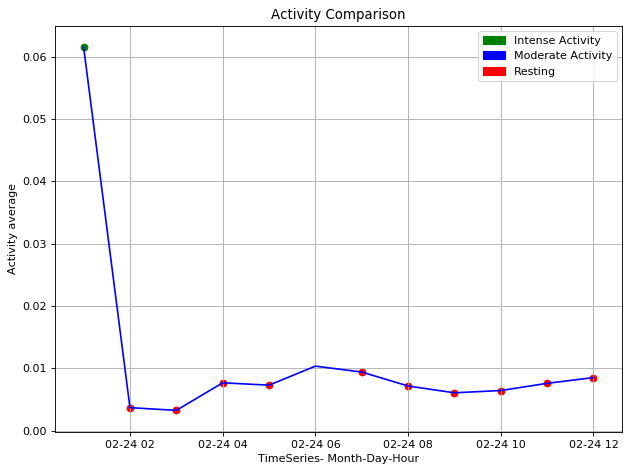

In [10]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# The x and y data to plot
y = final_data['activity']
x = final_data.index

# Threshold above which the markers should be red
threshold1 = 0.05
threshold2 = 0.01
threshold3 = 0.005

# Creating legend for Ideal heart_rate values
green_patch = mpatches.Patch(color='green', label='Intense Activity')
blue_patch = mpatches.Patch(color='blue', label='Moderate Activity')
red_patch = mpatches.Patch(color='red', label='Resting')

# Create figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Labelling the graph
plt.title("Activity Comparison")
plt.ylabel("Activity average")
plt.xlabel("TimeSeries- Month-Day-Hour")
plt.legend(handles=[green_patch, blue_patch, red_patch], loc=1)
plt.grid(True)
plt.tight_layout()

# Plot the line
plt.plot(x, y, color='blue')

# Add below threshold markers
below_threshold = y < threshold2
plt.scatter(x[below_threshold], y[below_threshold], color='red') 

# Add above threshold markers
above_threshold = y > threshold1
plt.scatter(x[above_threshold], y[above_threshold], color='green')

In [11]:
final_data

,breathing_rate,ventilation,activity,heart_rate,steps
TimeSeries,,,,,
2018-02-24 01:00:00,12.964777,12869.860206,0.061535,107.134880,2.262887
2018-02-24 02:00:00,2.068889,858.006044,0.003706,77.161667,0.327500
2018-02-24 03:00:00,2.000000,10.387911,0.003271,71.663611,0.000000
2018-02-24 04:00:00,2.000000,11.782311,0.007689,69.805000,0.000000
2018-02-24 05:00:00,2.000000,21.897244,0.007314,59.656389,0.000000
2018-02-24 06:00:00,2.000000,10.793689,0.010363,52.796944,0.000000
2018-02-24 07:00:00,2.000000,0.000000,0.009419,81.663056,0.000000
2018-02-24 08:00:00,2.000000,0.000000,0.007179,82.000000,0.000000
2018-02-24 09:00:00,2.000000,0.221333,0.006089,82.000000,0.000000


In [32]:
import plotly as py
import plotly.plotly as pys
import cufflinks as cf
import pandas as pd
import numpy as np
print(cf.__version__)

0.12.1


In [34]:
py.tools.set_credentials_file(username='ujwalpathak1994', api_key='Sor191d8z4STeeQUXm7N')

In [35]:
df = cf.datagen.lines()
df
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')

In [37]:
df = cf.datagen.lines()

pys.iplot([{
    'x': df.index,
    'y': df[col],
    'name': col
}  for col in df.columns])

In [39]:
pys.iplot([{
    'x': final_data.index,
    'y': final_data[col],
    'name': col
}  for col in final_data.columns])

In [44]:
final_data.iplot(kind='histogram', subplots=True, shape=(5, 1))

In [45]:
final_data.iplot(kind='area', fill=True)

In [53]:
final_data.iplot(subplots=True, subplot_titles=True, legend=False)


In [54]:
final_data.iplot(hline=[2,4],vline=['2015-02-10'])